# Exploratory Analysis Kiva Data

As always, at the beginning of our notebook let us import all of our libraries.

In [2]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 50)

Our main data set is our loans_full.csv. Let us import it and get a feel for the data.

In [4]:
data_path = '/Users/Sara/intro_course_data_science_for_good/data'

## Loans data set

In [8]:
loans_full=pd.read_csv(data_path+'/loans_full.csv', low_memory=False)

In [9]:
len(loans_full.index)

127900

In [10]:
loans_full.describe()

,Unnamed: 0,basket_amount,borrower_count,currency_exchange_loss_amount,funded_amount,id,image.id,image.template_id,lender_count,loan_amount,partner_id,video.id,video.thumbnailImageId
count,127900.000000,944.000000,127900.000000,24790.000000,127900.000000,1.279000e+05,1.279000e+05,127900.0,127900.000000,127900.000000,118262.00000,76.000000,7.600000e+01
mean,63949.500000,0.185381,1.860868,5.735730,452.238702,7.377539e+05,1.590475e+06,1.0,14.370985,472.349883,165.03559,1291.697368,6.155305e+05
std,36921.694052,2.145937,2.925932,12.991248,655.775669,3.427724e+05,6.066891e+05,0.0,19.631199,682.596785,66.00730,1027.999559,4.622450e+05
min,0.000000,0.000000,1.000000,0.010000,0.000000,2.510000e+02,4.090000e+02,1.0,0.000000,25.000000,6.00000,150.000000,2.975740e+05
25%,31974.750000,0.000000,1.000000,0.950000,225.000000,4.419678e+05,1.074678e+06,1.0,7.000000,250.000000,133.00000,487.750000,3.244948e+05
50%,63949.500000,0.000000,1.000000,2.560000,350.000000,7.640795e+05,1.683744e+06,1.0,11.000000,350.000000,156.00000,665.500000,3.361080e+05
75%,95924.250000,0.000000,1.000000,6.540000,575.000000,1.064133e+06,2.164059e+06,1.0,18.000000,600.000000,164.00000,2154.250000,6.247900e+05
max,127899.000000,25.000000,46.000000,1285.510000,50000.000000,1.292273e+06,2.516905e+06,1.0,1589.000000,50000.000000,526.00000,3008.000000,1.754457e+06


In the cell below, we look at 10 randomly selected rows from our KIVA dataset.

In [12]:
loans_full.sample(10)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrower_count,currency_exchange_loss_amount,description.languages,funded_amount,id,image.id,...,posted_date,sector,status,tags,themes,use,video.id,video.thumbnailImageId,video.title,video.youtubeId
104175,104175,Retail,NaN,False,1,NaN,['en'],250,372484,951322,...,2011-12-20T02:20:06Z,Retail,funded,[],NaN,"to buy sugar, cooking fat, maize flour, soda, ...",NaN,NaN,NaN,NaN
24014,24014,Dairy,NaN,False,1,NaN,['en'],475,1047594,2138987,...,2016-04-05T01:50:03Z,Agriculture,funded,"[{'name': '#Animals'}, {'name': '#Parent'}, {'...",['Rural Exclusion'],To buy a dairy cow.,NaN,NaN,NaN,NaN
54663,54663,Livestock,NaN,False,1,NaN,['en'],175,804174,1742265,...,2014-11-28T01:10:03Z,Agriculture,funded,[],NaN,To buy more cattle to sell.,NaN,NaN,NaN,NaN
27855,27855,Tailoring,NaN,False,1,NaN,['en'],100,1015839,2089787,...,2016-01-31T10:30:03Z,Services,funded,[],NaN,"to buy tailoring materials such as threads, ne...",NaN,NaN,NaN,NaN
101860,101860,Taxi,NaN,False,1,NaN,['en'],900,389427,1001163,...,2012-02-07T17:10:08Z,Transportation,expired,[],NaN,To buy tires for his car.,NaN,NaN,NaN,NaN
57454,57454,Clothing,NaN,False,1,1.74,['en'],125,1084285,2200300,...,2014-10-17T11:03:23Z,Clothing,funded,[],NaN,buy tailoring materials and also buy a sewing ...,NaN,NaN,NaN,NaN
13421,13421,Farming,NaN,False,1,NaN,['en'],300,1174081,2344691,...,2016-11-01T18:40:03Z,Agriculture,funded,"[{'name': 'user_favorite'}, {'name': '#Woman O...",['Rural Exclusion'],to buy farm inputs.,NaN,NaN,NaN,NaN
48364,48364,Cattle,NaN,False,1,4.20,['en'],275,851760,1830007,...,2015-03-13T00:40:05Z,Agriculture,funded,"[{'name': 'volunteer_pick'}, {'name': 'volunte...",NaN,to buy a dairy cow for milk production.,NaN,NaN,NaN,NaN
81401,81401,Cereals,NaN,True,1,NaN,['en'],500,559661,1351210,...,2013-05-18T18:20:02Z,Food,funded,[],NaN,"to purchase rice, beans, wheat and maize for r...",NaN,NaN,NaN,NaN
62983,62983,Poultry,NaN,False,1,2.13,['en'],250,734204,1641493,...,2014-07-09T12:20:03Z,Agriculture,funded,[],['Rural Exclusion'],To purchase poultry.,NaN,NaN,NaN,NaN


What is the [unique](https://en.wikipedia.org/wiki/Unique_key) key to our data set? For loans_full, each loan is a line and the id column contains no duplicates because each loan is unique. This makes the loan column the unique key.

We can use the code below to confirm that id contains no duplicates. When we sum the rows we have identified as duplicate, we should get a sum=0.

In [15]:
loans_full['is_duplicated'] = loans_full.duplicated(['id'])
loans_full['is_duplicated'].sum()

## Data Visualization 

In [35]:
loans_full.head(3)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrower_count,currency_exchange_loss_amount,description.languages,funded_amount,id,image.id,image.template_id,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,planned_expiration_date,posted_date,sector,status,tags,themes,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,is_duplicated
0,0,General Store,0.0,True,1,NaN,['en'],0,1288901,2512342,1,0,200,Kenya,KE,town,1 38,point,Kaloleni,Sidi,164.0,2017-06-05T15:20:06Z,2017-05-06T15:20:06Z,Retail,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",NaN,"to purchase sugar, rice, maize flour, and whea...",NaN,NaN,NaN,NaN,False
1,1,Farming,0.0,False,1,NaN,['en'],0,1287945,2511153,1,0,300,Kenya,KE,town,1 38,point,Maua,Joaninah,386.0,2017-06-05T15:00:06Z,2017-05-06T15:00:06Z,Agriculture,fundraising,"[{'name': 'user_favorite'}, {'name': '#Woman O...",NaN,to buy a water tank for farming and foodstuffs...,NaN,NaN,NaN,NaN,False
2,2,Fruits & Vegetables,NaN,True,1,NaN,['en'],300,1287784,2510933,1,9,300,Kenya,KE,town,-4.05 39.666667,point,Mombasa,Naomi,138.0,2017-06-05T06:30:02Z,2017-05-06T06:30:03Z,Food,funded,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",NaN,to buy more stock of vegetables and charcoal.,NaN,NaN,NaN,NaN,False


In [30]:
loans_full.status.unique()

array(['fundraising', 'funded', 'expired'], dtype=object)

In [31]:
loans_full.sector.unique()

array(['Retail', 'Agriculture', 'Food', 'Clothing', 'Services',
       'Manufacturing', 'Education', 'Wholesale', 'Transportation',
       'Health', 'Arts', 'Construction', 'Housing', 'Personal Use',
       'Entertainment'], dtype=object)

In [34]:
loans_full.activity.unique()

array(['General Store', 'Farming', 'Fruits & Vegetables', 'Food Market',
       'Clothing Sales', 'Beauty Salon', 'Tailoring', 'Poultry', 'Cereals',
       'Milk Sales', 'Dairy', 'Manufacturing', 'Retail', 'Charcoal Sales',
       'Primary/secondary school costs', 'Grocery Store', 'Wholesale',
       'Transportation', 'Pharmacy', 'Mobile Phones', 'Cafe',
       'Home Products Sales', 'Mobile Transactions', 'Animal Sales',
       'Cosmetics Sales', 'Traveling Sales', 'Livestock',
       'Water Distribution', 'Food', 'Used Clothing', 'Clothing', 'Cattle',
       'Printing', 'Restaurant', 'Fish Selling', 'Weaving', 'Butcher Shop',
       'Shoe Sales', 'Construction Supplies', 'Personal Housing Expenses',
       'Education provider', 'Food Production/Sales',
       'Motorcycle Transport', 'Fuel/Firewood', 'Hardware',
       'Waste Management', 'Photography', 'Quarrying', 'Metal Shop',
       'Agriculture', 'Food Stall', 'Services', 'Farm Supplies', 'Hotel',
       'Property', 'Home Energy'

In [38]:
loans_full['location.town'].unique()

array(['Kaloleni', 'Maua', 'Mombasa', ..., 'Gatunda', 'Kabati', 'Makongeni'], dtype=object)

## Loans details

In [5]:
loans_details=pd.read_csv(data_path+'/loans_details.csv', low_memory=False)

In [6]:
len(loans_details.index)

127900

In [12]:
loans_full.head(1)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrower_count,currency_exchange_loss_amount,description.languages,funded_amount,id,image.id,image.template_id,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,planned_expiration_date,posted_date,sector,status,tags,themes,use,video.id,video.thumbnailImageId,video.title,video.youtubeId
0,0,Farming,0.0,False,1,NaN,['en'],0,1291548,2516002,1,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",NaN,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN


In [13]:
loans_details.head(1)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,...,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId
0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,...,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN


In [40]:
p = ggplot(aes(x='status'), data=loans_full)

ValueError: color kwarg must have one color per dataset

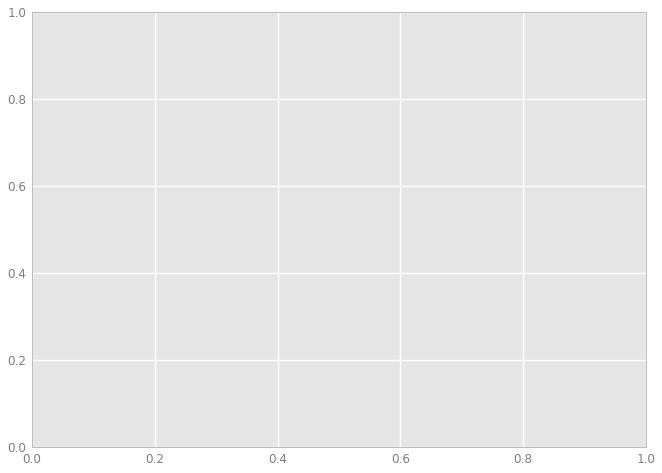

In [41]:
p + geom_histogram()

ValueError: color kwarg must have one color per dataset

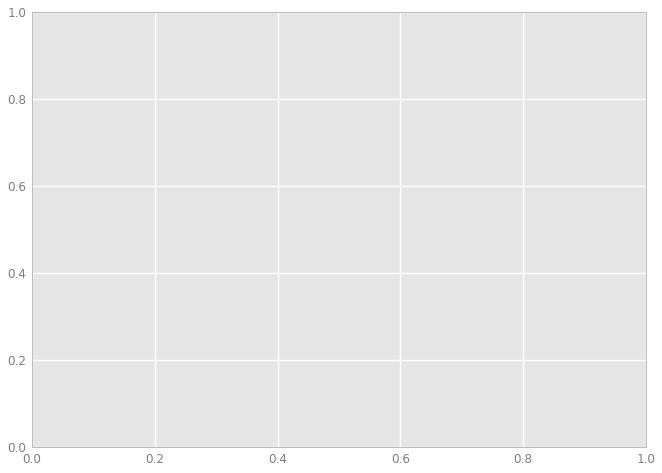

In [26]:
Aggplot(aes(x='sector'), data=loans_full) + geom_histogram()

In [20]:
p <- ggplot(data=loans_full, aes(x=sector)) + geom_histogram()

SyntaxError: positional argument follows keyword argument (<ipython-input-20-e5dd07ca844e>, line 1)

In [22]:
p <- ggplot(data=loans_full, aes(x=sector)) + geom_histogram()

SyntaxError: positional argument follows keyword argument (<ipython-input-22-e5dd07ca844e>, line 1)